In [47]:
import pandas as pd
import plotly.express as px


**What is a Plot?**
1. A plot is a visual representation of data.
2. It helps us see patterns, trends, comparisons, and relationships in data instead of reading numbers in tables.

@*Why Plotly is Important (Compared to Matplotlib & Seaborn)**

Plotly is a modern, interactive visualization library.

🔹 Advantages of Plotly over Matplotlib & Seaborn

**Interactive graphs**

1. Zoom, pan, hover, and select data points

2. Matplotlib & Seaborn are mostly static

**Web-ready & dashboards**

1. Works easily with web apps (Dash, Streamlit)

2. Best for real-time and business dashboards

**Better for large & complex data**

1. Smooth rendering for large datasets

2. Supports 3D plots, maps, animations

**Less code for advanced visuals**

1. Complex plots like maps and animations need fewer lines

**Professional & presentation-friendly**

1. Clean UI, tooltips, legends

2. Looks better for reports and demos

**Cross-platform**

1. Works in Jupyter Notebook, browser, and web apps

**Comparison Table**
1. Feature	           Plotly	  Matplotlib	Seaborn
2. Interactivity	   ✅ Yes	   ❌ No	     ❌ No
3. Ease of Use        Easy      Medium	         Easy
4. Web Dashboards	   ✅ Best	   ❌ No	    ❌ No
5. 3D & Maps	       ✅ Strong  Limited	    ❌ No
6. Custom Styling	   Medium	  ✅ Very High	Medium

**When to Use What?**

1. Use Plotly → Interactive dashboards, web apps, presentations

2. Use Matplotlib → Research papers, static plots, full customization

3. Use Seaborn → Statistical plots with less code

**Plotly is preferred over Matplotlib and Seaborn because it provides interactive, web-ready, and visually rich plots, though it is heavier and less suitable for static print outputs.**

**Plotly Express (plotly.express) is used because it provides a simple, fast, and high-level way to create plots with less code.**

In [48]:
df=pd.read_csv("sales.csv")
df

,Date,Region,Product,Category,Sales,Profit,Quantity
0,2024-01-01,South,Car A,Sedan,500000,60000,5
1,2024-01-02,North,Car B,SUV,700000,90000,4
2,2024-01-03,East,Car C,Hatchback,300000,40000,6
3,2024-01-04,West,Car A,Sedan,450000,55000,3
4,2024-01-05,South,Car B,SUV,650000,85000,5
5,2024-01-06,North,Car C,Hatchback,280000,35000,4


In [49]:
px.scatter(df, x="Sales", y="Profit")

In [50]:
px.scatter(df, x="Sales", y="Profit", size="Quantity")


Plotly Express is intentionally designed to be a high-level, single-figure API.
Its goal is simplicity and speed, not complex layouts

1. Plotly Express = one chart per call
2. Graph Objects = many charts per figure

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [52]:
# Create subplots (3x2)
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=[
        "Basic Scatter",
        "Color by Region",
        "Bubble Scatter (Quantity)",
        "Symbol by Category",
        "Sales vs Profit with Trend",
        "Hover Information"
    ]
)

# Basic Scatter
fig.add_trace(
    go.Scatter(x=df["Sales"], y=df["Profit"], mode="markers"),
    row=1, col=1
)

# Color by Region
fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=df["Profit"],
        mode="markers",
        marker=dict(color=df["Sales"], showscale=True)
    ),
    row=1, col=2
)

# Bubble Scatter
fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=df["Profit"],
        mode="markers",
        marker=dict(size=df["Quantity"] * 2)
    ),
    row=2, col=1
)

# Symbol by Category
symbols = df["Category"].map({"A": "circle", "B": "square"}).fillna("circle")
fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=df["Profit"],
        mode="markers",
        marker=dict(symbol=symbols)
    ),
    row=2, col=2
)

# Trendline (manual)
z = np.polyfit(df["Sales"], df["Profit"], 1)
p = np.poly1d(z)

fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=p(df["Sales"]),
        mode="lines"
    ),
    row=3, col=1
)

# Hover Information
fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=df["Profit"],
        mode="markers",
        text=df["Region"],
        hovertemplate="Region: %{text}<br>Sales: %{x}<br>Profit: %{y}"
    ),
    row=3, col=2
)

# Layout
fig.update_layout(
    title="Scatter Plot Subplots for Sales vs Profit",
    height=900,
    showlegend=False
)

fig.show()


In [53]:
# Create subplots with spacing control (tight_layout alternative)
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[
        "Basic Styled Scatter",
        "Color & Size Customization",
        "Symbols with Reference Line",
        "Trendline with Annotation"
    ],
    shared_xaxes=True,
    shared_yaxes=True,
    horizontal_spacing=0.08,   # spacing between columns
    vertical_spacing=0.12      # spacing between rows
)

# Basic styled scatter
fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=df["Profit"],
        mode="markers",
        marker=dict(size=10, opacity=0.7),
        name="Basic"
    ),
    row=1, col=1
)

# Color + Size
fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=df["Profit"],
        mode="markers",
        marker=dict(
            size=df["Quantity"] * 2,
            color=df["Sales"],
            showscale=True,
            opacity=0.8,
            line=dict(width=1)
        ),
        name="Color & Size",
        hovertemplate="Sales: %{x}<br>Profit: %{y}<br>Qty: %{marker.size}"
    ),
    row=1, col=2
)

#Symbols + Reference line
symbols = df["Category"].map({"A": "circle", "B": "diamond"}).fillna("circle")
fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=df["Profit"],
        mode="markers",
        marker=dict(symbol=symbols, size=12),
        name="Symbols"
    ),
    row=2, col=1
)

fig.add_hline(
    y=100,
    line_dash="dash",
    annotation_text="Target Profit",
    row=2, col=1
)

#Trendline + annotation
z = np.polyfit(df["Sales"], df["Profit"], 1)
p = np.poly1d(z)

fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=df["Profit"],
        mode="markers",
        name="Data"
    ),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(
        x=df["Sales"],
        y=p(df["Sales"]),
        mode="lines",
        name="Trendline"
    ),
    row=2, col=2
)

fig.add_annotation(
    text="Positive Sales–Profit Relationship",
    x=1000,
    y=160,
    showarrow=True,
    row=2, col=2
)

# Layout = tight_layout replacement
fig.update_layout(
    title="Sales vs Profit — Highly Customized Subplots",
    height=850,
    width=1100,
    hovermode="x unified",
    showlegend=True,
    margin=dict(
        l=50,   # left margin
        r=80,   # right margin
        t=80,   # top margin
        b=50    # bottom margin
    )
)

# Axis formatting
fig.update_xaxes(
    title_text="Sales (₹)",
    tickprefix="₹",
    showgrid=True
)

fig.update_yaxes(
    title_text="Profit (₹)",
    tickprefix="₹",
    showgrid=True
)

fig.show()


In [54]:
fig = px.line(
    df,
    x="Date",
    y="Profit",
    title="Line Plot: Sales vs Profit",
    markers=True
)

fig.show()


In [55]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Profit"],
        mode="lines+markers",
        name="Profit"
    )
)

fig.update_layout(
    title="Line Plot:Date vs Profit",
    xaxis_title="Date",
    yaxis_title="Profit"
)

fig.show()


In [56]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Basic Sales Line Plot",
        "Profit Line Plot",
        "Sales by Region",
        "Sales & Profit with Annotations"
    ],
    horizontal_spacing=0.12,
    vertical_spacing=0.15
)
# Basic Sales Line
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Sales"],
        mode="lines+markers",
        name="Sales",
        line=dict(color="blue", width=3),
        marker=dict(size=8)
    ),
    row=1, col=1
)

#Profit Line
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Profit"],
        mode="lines+markers",
        name="Profit",
        line=dict(color="green", width=3, dash="dot"),
        marker=dict(size=8)
    ),
    row=1, col=2
)
# Multiple Lines by Region
regions = df["Region"].unique()
colors = ["red", "blue", "green", "orange"]

for i, region in enumerate(regions):
    df_region = df[df["Region"]==region]
    fig.add_trace(
        go.Scatter(
            x=df_region["Date"],
            y=df_region["Sales"],
            mode="lines+markers",
            name=f"Sales {region}",
            line=dict(color=colors[i], width=2),
            marker=dict(size=7)
        ),
        row=2, col=1
    )

# Sales & Profit with Annotations
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Sales"],
        mode="lines+markers",
        name="Sales",
        line=dict(color="blue", width=2)
    ),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Profit"],
        mode="lines+markers",
        name="Profit",
        line=dict(color="green", width=2, dash="dot")
    ),
    row=2, col=2
)

# Add annotation for peak Sales
peak_sales = df.loc[df["Sales"].idxmax()]
fig.add_annotation(
    x=peak_sales["Date"],
    y=peak_sales["Sales"],
    text="Peak Sales",
    showarrow=True,
    arrowhead=2,
    row=2, col=2
)

# Layout adjustments
fig.update_layout(
    title="Customized Line Plot Subplots",
    height=850,
    width=1100,
    hovermode="x unified",
    margin=dict(l=60, r=60, t=100, b=60),
    template="plotly_white",
    legend_title_text="Metrics"
)

# Rotate x-axis labels to avoid overlap
fig.update_xaxes(tickformat="%Y-%m-%d", tickangle=-45)

# Update y-axes titles
fig.update_yaxes(title_text="Sales (₹)", row=1, col=1)
fig.update_yaxes(title_text="Profit (₹)", row=1, col=2)
fig.update_yaxes(title_text="Sales (₹)", row=2, col=1)
fig.update_yaxes(title_text="Amount (₹)", row=2, col=2)

fig.show()


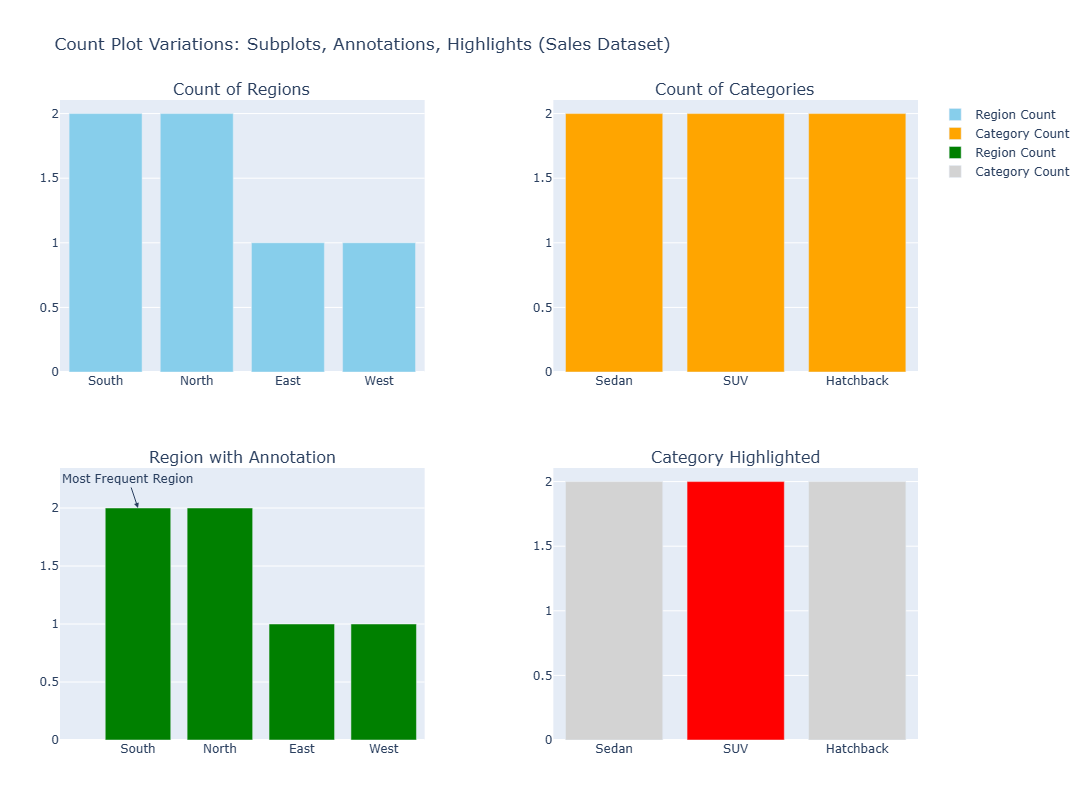

In [57]:
count_region = df["Region"].value_counts().reset_index()
count_region.columns = ["Region", "Count"]

count_category = df["Category"].value_counts().reset_index()
count_category.columns = ["Category", "Count"]

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[
        "Count of Regions",
        "Count of Categories",
        "Region with Annotation",
        "Category Highlighted"
    ],
    horizontal_spacing=0.15,
    vertical_spacing=0.15
)

fig.add_trace(
    go.Bar(x=count_region["Region"], y=count_region["Count"], name="Region Count", marker_color="skyblue"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=count_category["Category"], y=count_category["Count"], name="Category Count", marker_color="orange"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=count_region["Region"], y=count_region["Count"], name="Region Count", marker_color="green"),
    row=2, col=1
)
most_region = count_region.loc[count_region["Count"].idxmax()]
fig.add_annotation(
    x=most_region["Region"],
    y=most_region["Count"],
    text="Most Frequent Region",
    showarrow=True,
    arrowhead=2,
    row=2, col=1
)

colors = ["red" if c=="SUV" else "lightgrey" for c in count_category["Category"]]
fig.add_trace(
    go.Bar(x=count_category["Category"], y=count_category["Count"], name="Category Count", marker_color=colors),
    row=2, col=2
)
fig.update_layout(
    title="Count Plot Variations: Subplots, Annotations, Highlights (Sales Dataset)",
    height=800,
    width=1000,
    margin=dict(l=60, r=60, t=100, b=60),
    hovermode="x unified"
)

fig.show()


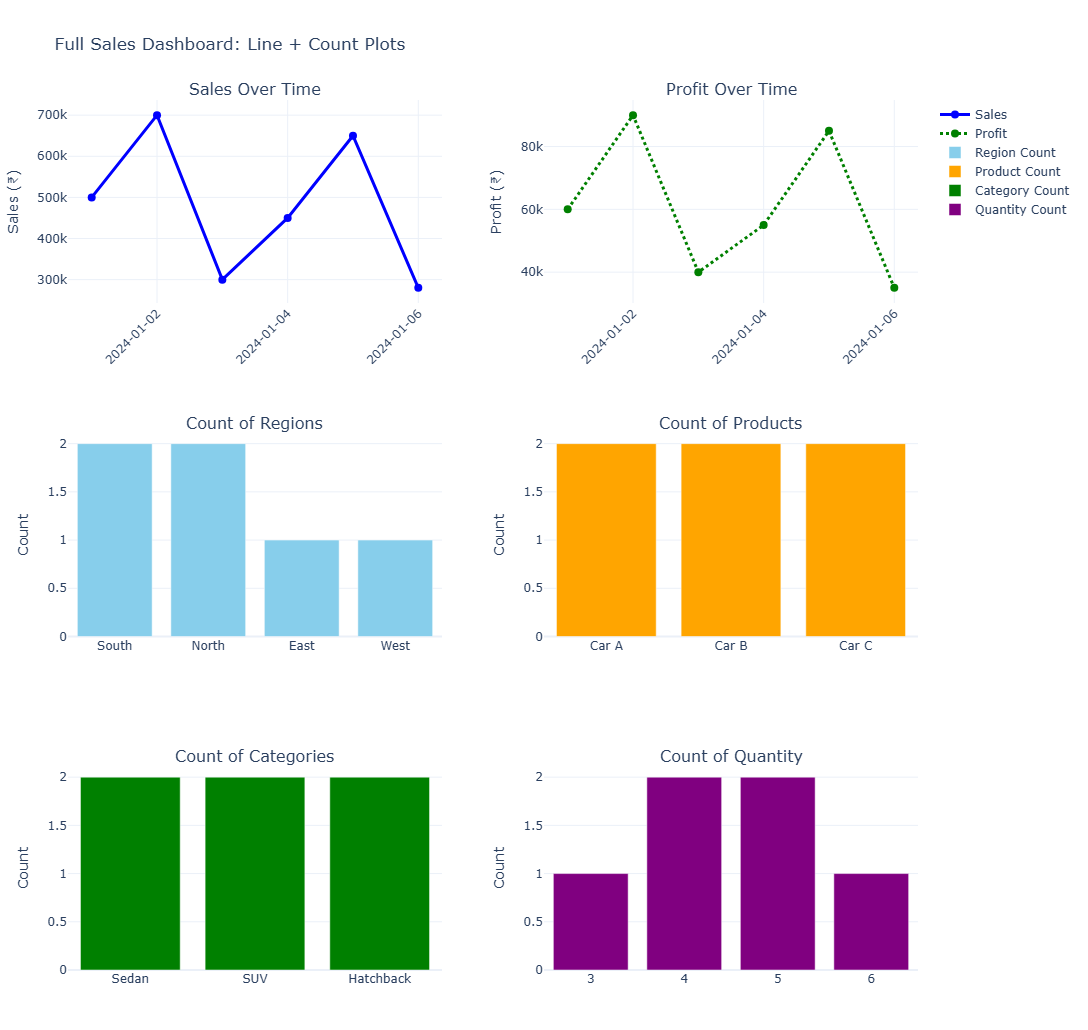

In [58]:
count_region = df["Region"].value_counts()
count_product = df["Product"].value_counts()
count_category = df["Category"].value_counts()
count_quantity = df["Quantity"].value_counts().sort_index()
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=[
        "Sales Over Time",
        "Profit Over Time",
        "Count of Regions",
        "Count of Products",
        "Count of Categories",
        "Count of Quantity"
    ],
    specs=[
        [{"type": "scatter"}, {"type": "scatter"}],
        [{"type": "bar"}, {"type": "bar"}],
        [{"type": "bar"}, {"type": "bar"}]
    ],
    horizontal_spacing=0.12,
    vertical_spacing=0.15
)

fig.add_trace(
    go.Scatter(x=df["Date"], y=df["Sales"], mode="lines+markers", name="Sales",
               line=dict(color="blue", width=3), marker=dict(size=8)),
    row=1, col=1
)

# Profit Line
fig.add_trace(
    go.Scatter(x=df["Date"], y=df["Profit"], mode="lines+markers", name="Profit",
               line=dict(color="green", width=3, dash="dot"), marker=dict(size=8)),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=count_region.index, y=count_region.values, name="Region Count", marker_color="skyblue"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=count_product.index, y=count_product.values, name="Product Count", marker_color="orange"),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x=count_category.index, y=count_category.values, name="Category Count", marker_color="green"),
    row=3, col=1
)

fig.add_trace(
    go.Bar(x=count_quantity.index, y=count_quantity.values, name="Quantity Count", marker_color="purple"),
    row=3, col=2
)

fig.update_layout(
    title="Full Sales Dashboard: Line + Count Plots",
    height=1000,
    width=1100,
    hovermode="x unified",
    template="plotly_white",
    margin=dict(l=60, r=60, t=100, b=60)
)

fig.update_xaxes(tickformat="%Y-%m-%d", tickangle=-45, row=1, col=1)
fig.update_xaxes(tickformat="%Y-%m-%d", tickangle=-45, row=1, col=2)

fig.update_yaxes(title_text="Sales (₹)", row=1, col=1)
fig.update_yaxes(title_text="Profit (₹)", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)
fig.update_yaxes(title_text="Count", row=3, col=1)
fig.update_yaxes(title_text="Count", row=3, col=2)

fig.show()
